# definition 1

In [1]:
from keras.preprocessing.text import Tokenizer
import codecs
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import nltk
from konlpy.tag import Okt
from tqdm import tqdm

# train set
name = "1"
filename1 = './new_data/definition'+name+'_spynorth_scaling_trust.txt'
filename2 = './new_data/definition'+name+'_spynorth_scaling_untrust.txt'
filename3 = './new_data/definition'+name+'_intistranger_scaling_trust.txt'
filename4 = './new_data/definition'+name+'_intistranger_scaling_untrust.txt'
filename5 = './new_data/definition'+name+'_gongjo_scaling_trust.txt'
filename6 = './new_data/definition'+name+'_gongjo_scaling_untrust.txt'
filename7 = './new_data/definition'+name+'_1987_scaling_trust.txt'
filename8 = './new_data/definition'+name+'_1987_scaling_untrust.txt'
filename9 = './new_data/definition'+name+'_taxi_scaling_trust.txt'
filename10 = './new_data/definition'+name+'_taxi_scaling_untrust.txt'


with codecs.open(filename1, 'r', encoding='utf-8') as f:
    lines1 = f.readlines()
with codecs.open(filename2, 'r', encoding='utf-8') as f:
    lines2 = f.readlines()
with codecs.open(filename3, 'r', encoding='utf-8') as f:
    lines3 = f.readlines()
with codecs.open(filename4, 'r', encoding='utf-8') as f:
    lines4 = f.readlines()
with codecs.open(filename5, 'r', encoding='utf-8') as f:
    lines5 = f.readlines()
with codecs.open(filename6, 'r', encoding='utf-8') as f:
    lines6 = f.readlines()
with codecs.open(filename7, 'r', encoding='utf-8') as f:
    lines7 = f.readlines()
with codecs.open(filename8, 'r', encoding='utf-8') as f:
    lines8 = f.readlines()
with codecs.open(filename9, 'r', encoding='utf-8') as f:
    lines9 = f.readlines()
with codecs.open(filename10, 'r', encoding='utf-8') as f:
    lines10 = f.readlines()




# test set


with codecs.open('./new_data/definition'+name+'_spynorth_test_t.txt', 'r', 'utf-8') as f:
    test1 = f.readlines()
with codecs.open('./new_data/definition'+name+'_spynorth_test_ut.txt', 'r', 'utf-8') as f:
    test2 = f.readlines()
with codecs.open('./new_data/definition'+name+'_intistranger_test_t.txt', 'r', encoding='utf-8') as f:
    test3 = f.readlines()
with codecs.open('./new_data/definition'+name+'_intistranger_test_ut.txt', 'r', encoding='utf-8') as f:
    test4 = f.readlines()
with codecs.open('./new_data/definition'+name+'_gongjo_test_t.txt', 'r', encoding='utf-8') as f:
    test5 = f.readlines()
with codecs.open('./new_data/definition'+name+'_gongjo_test_ut.txt', 'r', encoding='utf-8') as f:
    test6 = f.readlines()
with codecs.open('./new_data/definition'+name+'_1987_test_t.txt', 'r', encoding='utf-8') as f:
    test7 = f.readlines()
with codecs.open('./new_data/definition'+name+'_1987_test_ut.txt', 'r', encoding='utf-8') as f:
    test8 = f.readlines()
with codecs.open('./new_data/definition'+name+'_taxi_test_t.txt', 'r', encoding='utf-8') as f:
    test9 = f.readlines()
with codecs.open('./new_data/definition'+name+'_taxi_test_ut.txt', 'r', encoding='utf-8') as f:
    test10 = f.readlines()

    

lines_t = lines1 + lines3 + lines5
lines_ut = lines2 + lines4 + lines6
test_t = test1 + test3 + test5
test_ut = test2 + test4 + test6

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)




100%|██████████████████████████████████████████████████████████████████████████████| 4801/4801 [12:59<00:00,  6.16it/s]


Epoch 1/10
120/120 [==============================] - 26s 206ms/step - loss: 0.6617 - acc: 0.6188 - val_loss: 0.9345 - val_acc: 0.0146
Epoch 2/10
120/120 [==============================] - 25s 206ms/step - loss: 0.5838 - acc: 0.6977 - val_loss: 0.6259 - val_acc: 0.6990
Epoch 3/10
120/120 [==============================] - 24s 203ms/step - loss: 0.4673 - acc: 0.7926 - val_loss: 0.8656 - val_acc: 0.4776
Epoch 4/10
120/120 [==============================] - 24s 204ms/step - loss: 0.3368 - acc: 0.8722 - val_loss: 0.8639 - val_acc: 0.5508
Epoch 5/10
120/120 [==============================] - 24s 204ms/step - loss: 0.2727 - acc: 0.8977 - val_loss: 1.0238 - val_acc: 0.5130
Epoch 6/10
120/120 [==============================] - 25s 205ms/step - loss: 0.1586 - acc: 0.9499 - val_loss: 0.9647 - val_acc: 0.5724
Epoch 7/10
120/120 [==============================] - 25s 206ms/step - loss: 0.3360 - acc: 0.8548 - val_loss: 1.1545 - val_acc: 0.5411
Epoch 8/10
120/120 [==============================] - 2

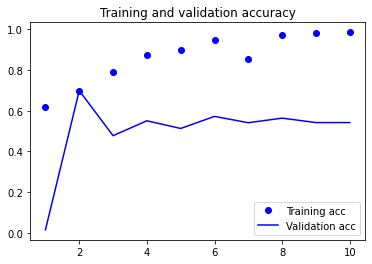

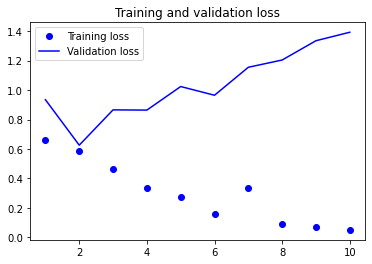

151/151 [==============================] - 4s 27ms/step - loss: 1.3769 - acc: 0.5303
Epoch 1/10
120/120 [==============================] - 53s 432ms/step - loss: 0.6181 - acc: 0.6635 - val_loss: 0.5925 - val_acc: 0.8102
Epoch 2/10
120/120 [==============================] - 51s 424ms/step - loss: 0.5262 - acc: 0.7498 - val_loss: 0.5972 - val_acc: 0.7190
Epoch 3/10
120/120 [==============================] - 50s 421ms/step - loss: 0.4694 - acc: 0.7877 - val_loss: 0.8354 - val_acc: 0.5727
Epoch 4/10
120/120 [==============================] - 51s 429ms/step - loss: 0.4362 - acc: 0.8111 - val_loss: 1.0038 - val_acc: 0.5214
Epoch 5/10
120/120 [==============================] - 51s 427ms/step - loss: 0.4058 - acc: 0.8291 - val_loss: 0.8940 - val_acc: 0.5456
Epoch 6/10
120/120 [==============================] - 51s 424ms/step - loss: 0.3877 - acc: 0.8395 - val_loss: 0.6942 - val_acc: 0.6557
Epoch 7/10
120/120 [==============================] - 51s 426ms/step - loss: 0.3671 - acc: 0.8516 - val_l

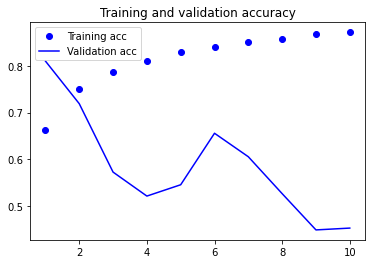

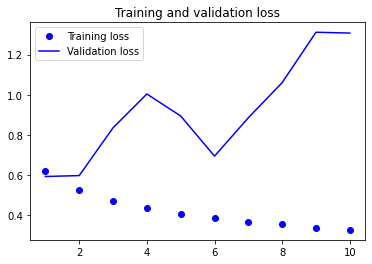

151/151 [==============================] - 9s 57ms/step - loss: 1.0869 - acc: 0.5205


[1.0869373083114624, 0.520516574382782]

In [2]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

# definition 2

In [3]:
from keras.preprocessing.text import Tokenizer
import codecs
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import nltk
from konlpy.tag import Okt
from tqdm import tqdm

# train set
name = "2"
filename1 = './new_data/definition'+name+'_spynorth_scaling_trust.txt'
filename2 = './new_data/definition'+name+'_spynorth_scaling_untrust.txt'
filename3 = './new_data/definition'+name+'_intistranger_scaling_trust.txt'
filename4 = './new_data/definition'+name+'_intistranger_scaling_untrust.txt'
filename5 = './new_data/definition'+name+'_gongjo_scaling_trust.txt'
filename6 = './new_data/definition'+name+'_gongjo_scaling_untrust.txt'
filename7 = './new_data/definition'+name+'_1987_scaling_trust.txt'
filename8 = './new_data/definition'+name+'_1987_scaling_untrust.txt'
filename9 = './new_data/definition'+name+'_taxi_scaling_trust.txt'
filename10 = './new_data/definition'+name+'_taxi_scaling_untrust.txt'


with codecs.open(filename1, 'r', encoding='utf-8') as f:
    lines1 = f.readlines()
with codecs.open(filename2, 'r', encoding='utf-8') as f:
    lines2 = f.readlines()
with codecs.open(filename3, 'r', encoding='utf-8') as f:
    lines3 = f.readlines()
with codecs.open(filename4, 'r', encoding='utf-8') as f:
    lines4 = f.readlines()
with codecs.open(filename5, 'r', encoding='utf-8') as f:
    lines5 = f.readlines()
with codecs.open(filename6, 'r', encoding='utf-8') as f:
    lines6 = f.readlines()
with codecs.open(filename7, 'r', encoding='utf-8') as f:
    lines7 = f.readlines()
with codecs.open(filename8, 'r', encoding='utf-8') as f:
    lines8 = f.readlines()
with codecs.open(filename9, 'r', encoding='utf-8') as f:
    lines9 = f.readlines()
with codecs.open(filename10, 'r', encoding='utf-8') as f:
    lines10 = f.readlines()




# test set


with codecs.open('./new_data/definition'+name+'_spynorth_test_t.txt', 'r', 'utf-8') as f:
    test1 = f.readlines()
with codecs.open('./new_data/definition'+name+'_spynorth_test_ut.txt', 'r', 'utf-8') as f:
    test2 = f.readlines()
with codecs.open('./new_data/definition'+name+'_intistranger_test_t.txt', 'r', encoding='utf-8') as f:
    test3 = f.readlines()
with codecs.open('./new_data/definition'+name+'_intistranger_test_ut.txt', 'r', encoding='utf-8') as f:
    test4 = f.readlines()
with codecs.open('./new_data/definition'+name+'_gongjo_test_t.txt', 'r', encoding='utf-8') as f:
    test5 = f.readlines()
with codecs.open('./new_data/definition'+name+'_gongjo_test_ut.txt', 'r', encoding='utf-8') as f:
    test6 = f.readlines()
with codecs.open('./new_data/definition'+name+'_1987_test_t.txt', 'r', encoding='utf-8') as f:
    test7 = f.readlines()
with codecs.open('./new_data/definition'+name+'_1987_test_ut.txt', 'r', encoding='utf-8') as f:
    test8 = f.readlines()
with codecs.open('./new_data/definition'+name+'_taxi_test_t.txt', 'r', encoding='utf-8') as f:
    test9 = f.readlines()
with codecs.open('./new_data/definition'+name+'_taxi_test_ut.txt', 'r', encoding='utf-8') as f:
    test10 = f.readlines()

    

lines_t = lines1 + lines3 + lines5
lines_ut = lines2 + lines4 + lines6
test_t = test1 + test3 + test5
test_ut = test2 + test4 + test6

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)




100%|██████████████████████████████████████████████████████████████████████████████| 4801/4801 [14:20<00:00,  5.58it/s]


Epoch 1/10
121/121 [==============================] - 25s 186ms/step - loss: 0.6641 - acc: 0.6145 - val_loss: 0.9267 - val_acc: 0.0060
Epoch 2/10
121/121 [==============================] - 22s 182ms/step - loss: 0.5967 - acc: 0.6832 - val_loss: 0.9000 - val_acc: 0.2747
Epoch 3/10
121/121 [==============================] - 22s 181ms/step - loss: 0.4567 - acc: 0.8132 - val_loss: 1.7763 - val_acc: 0.0354
Epoch 4/10
121/121 [==============================] - 22s 181ms/step - loss: 0.3458 - acc: 0.8688 - val_loss: 1.1035 - val_acc: 0.4025
Epoch 5/10
121/121 [==============================] - 22s 182ms/step - loss: 0.1859 - acc: 0.9452 - val_loss: 1.3826 - val_acc: 0.3856
Epoch 6/10
121/121 [==============================] - 22s 183ms/step - loss: 0.1117 - acc: 0.9693 - val_loss: 1.5309 - val_acc: 0.4114
Epoch 7/10
121/121 [==============================] - 22s 182ms/step - loss: 0.0677 - acc: 0.9824 - val_loss: 1.8414 - val_acc: 0.3770
Epoch 8/10
121/121 [==============================] - 2

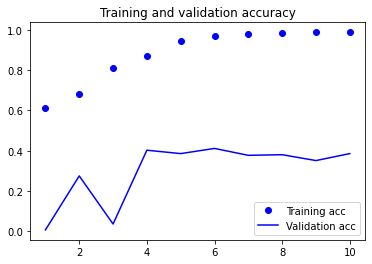

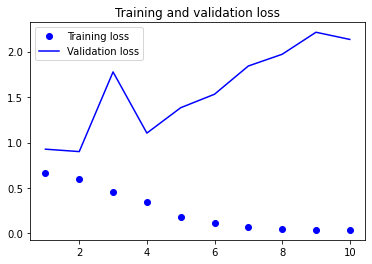

151/151 [==============================] - 4s 26ms/step - loss: 1.5715 - acc: 0.5014
Epoch 1/10
121/121 [==============================] - 55s 444ms/step - loss: 0.6406 - acc: 0.6422 - val_loss: 1.0191 - val_acc: 0.3083
Epoch 2/10
121/121 [==============================] - 51s 425ms/step - loss: 0.5860 - acc: 0.7062 - val_loss: 0.6109 - val_acc: 0.8180
Epoch 3/10
121/121 [==============================] - 51s 420ms/step - loss: 0.5411 - acc: 0.7383 - val_loss: 1.3199 - val_acc: 0.2481
Epoch 4/10
121/121 [==============================] - 53s 434ms/step - loss: 0.5075 - acc: 0.7626 - val_loss: 1.0198 - val_acc: 0.5470
Epoch 5/10
121/121 [==============================] - 52s 427ms/step - loss: 0.4811 - acc: 0.7834 - val_loss: 1.1493 - val_acc: 0.3161
Epoch 6/10
121/121 [==============================] - 52s 432ms/step - loss: 0.4514 - acc: 0.8015 - val_loss: 0.5280 - val_acc: 0.7735
Epoch 7/10
121/121 [==============================] - 52s 430ms/step - loss: 0.4349 - acc: 0.8113 - val_l

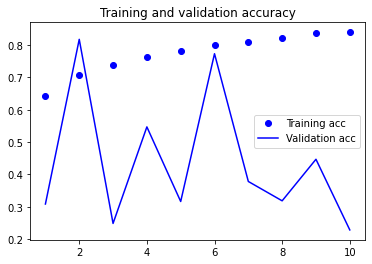

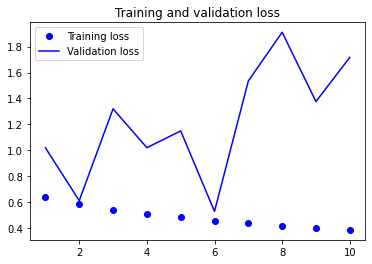

151/151 [==============================] - 8s 56ms/step - loss: 0.9953 - acc: 0.5301: 1s -


[0.99534010887146, 0.5300979018211365]

In [4]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

# definition 3

In [5]:
from keras.preprocessing.text import Tokenizer
import codecs
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import nltk
from konlpy.tag import Okt
from tqdm import tqdm

# train set
name = "3"
filename1 = './new_data/definition'+name+'_spynorth_scaling_trust.txt'
filename2 = './new_data/definition'+name+'_spynorth_scaling_untrust.txt'
filename3 = './new_data/definition'+name+'_intistranger_scaling_trust.txt'
filename4 = './new_data/definition'+name+'_intistranger_scaling_untrust.txt'
filename5 = './new_data/definition'+name+'_gongjo_scaling_trust.txt'
filename6 = './new_data/definition'+name+'_gongjo_scaling_untrust.txt'
filename7 = './new_data/definition'+name+'_1987_scaling_trust.txt'
filename8 = './new_data/definition'+name+'_1987_scaling_untrust.txt'
filename9 = './new_data/definition'+name+'_taxi_scaling_trust.txt'
filename10 = './new_data/definition'+name+'_taxi_scaling_untrust.txt'


with codecs.open(filename1, 'r', encoding='utf-8') as f:
    lines1 = f.readlines()
with codecs.open(filename2, 'r', encoding='utf-8') as f:
    lines2 = f.readlines()
with codecs.open(filename3, 'r', encoding='utf-8') as f:
    lines3 = f.readlines()
with codecs.open(filename4, 'r', encoding='utf-8') as f:
    lines4 = f.readlines()
with codecs.open(filename5, 'r', encoding='utf-8') as f:
    lines5 = f.readlines()
with codecs.open(filename6, 'r', encoding='utf-8') as f:
    lines6 = f.readlines()
with codecs.open(filename7, 'r', encoding='utf-8') as f:
    lines7 = f.readlines()
with codecs.open(filename8, 'r', encoding='utf-8') as f:
    lines8 = f.readlines()
with codecs.open(filename9, 'r', encoding='utf-8') as f:
    lines9 = f.readlines()
with codecs.open(filename10, 'r', encoding='utf-8') as f:
    lines10 = f.readlines()




# test set


with codecs.open('./new_data/definition'+name+'_spynorth_test_t.txt', 'r', 'utf-8') as f:
    test1 = f.readlines()
with codecs.open('./new_data/definition'+name+'_spynorth_test_ut.txt', 'r', 'utf-8') as f:
    test2 = f.readlines()
with codecs.open('./new_data/definition'+name+'_intistranger_test_t.txt', 'r', encoding='utf-8') as f:
    test3 = f.readlines()
with codecs.open('./new_data/definition'+name+'_intistranger_test_ut.txt', 'r', encoding='utf-8') as f:
    test4 = f.readlines()
with codecs.open('./new_data/definition'+name+'_gongjo_test_t.txt', 'r', encoding='utf-8') as f:
    test5 = f.readlines()
with codecs.open('./new_data/definition'+name+'_gongjo_test_ut.txt', 'r', encoding='utf-8') as f:
    test6 = f.readlines()
with codecs.open('./new_data/definition'+name+'_1987_test_t.txt', 'r', encoding='utf-8') as f:
    test7 = f.readlines()
with codecs.open('./new_data/definition'+name+'_1987_test_ut.txt', 'r', encoding='utf-8') as f:
    test8 = f.readlines()
with codecs.open('./new_data/definition'+name+'_taxi_test_t.txt', 'r', encoding='utf-8') as f:
    test9 = f.readlines()
with codecs.open('./new_data/definition'+name+'_taxi_test_ut.txt', 'r', encoding='utf-8') as f:
    test10 = f.readlines()

    

lines_t = lines1 + lines3 + lines5
lines_ut = lines2 + lines4 + lines6
test_t = test1 + test3 + test5
test_ut = test2 + test4 + test6

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)




100%|██████████████████████████████████████████████████████████████████████████████| 4801/4801 [14:16<00:00,  5.60it/s]


Epoch 1/10
121/121 [==============================] - 23s 180ms/step - loss: 0.6569 - acc: 0.6235 - val_loss: 0.9554 - val_acc: 0.0359
Epoch 2/10
121/121 [==============================] - 22s 179ms/step - loss: 0.6030 - acc: 0.6830 - val_loss: 0.8080 - val_acc: 0.4176
Epoch 3/10
121/121 [==============================] - 23s 188ms/step - loss: 0.4664 - acc: 0.8013 - val_loss: 1.0751 - val_acc: 0.3283
Epoch 4/10
121/121 [==============================] - 23s 188ms/step - loss: 0.3106 - acc: 0.8863 - val_loss: 0.7975 - val_acc: 0.5910
Epoch 5/10
121/121 [==============================] - 22s 186ms/step - loss: 0.2090 - acc: 0.9292 - val_loss: 1.9057 - val_acc: 0.2879
Epoch 6/10
121/121 [==============================] - 24s 195ms/step - loss: 0.1195 - acc: 0.9688 - val_loss: 1.4352 - val_acc: 0.4647
Epoch 7/10
121/121 [==============================] - 22s 183ms/step - loss: 0.2052 - acc: 0.9145 - val_loss: 1.9805 - val_acc: 0.3556
Epoch 8/10
121/121 [==============================] - 2

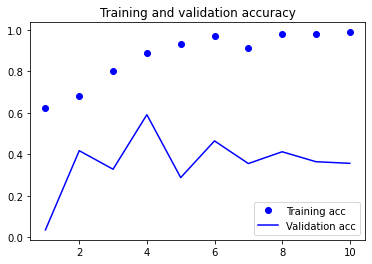

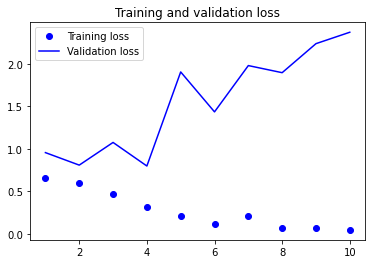

151/151 [==============================] - 4s 25ms/step - loss: 1.5483 - acc: 0.5182
Epoch 1/10
121/121 [==============================] - 55s 441ms/step - loss: 0.6418 - acc: 0.6256 - val_loss: 0.7876 - val_acc: 0.2484
Epoch 2/10
121/121 [==============================] - 53s 437ms/step - loss: 0.6033 - acc: 0.6727 - val_loss: 2.3268 - val_acc: 0.0026
Epoch 3/10
121/121 [==============================] - 53s 442ms/step - loss: 0.5634 - acc: 0.7129 - val_loss: 0.6811 - val_acc: 0.6592
Epoch 4/10
121/121 [==============================] - 53s 435ms/step - loss: 0.5199 - acc: 0.7475 - val_loss: 1.7059 - val_acc: 0.2760
Epoch 5/10
121/121 [==============================] - 54s 448ms/step - loss: 0.4840 - acc: 0.7761 - val_loss: 2.9233 - val_acc: 0.0375
Epoch 6/10
121/121 [==============================] - 53s 437ms/step - loss: 0.4584 - acc: 0.7908 - val_loss: 1.5924 - val_acc: 0.1921
Epoch 7/10
121/121 [==============================] - 52s 434ms/step - loss: 0.4241 - acc: 0.8115 - val_l

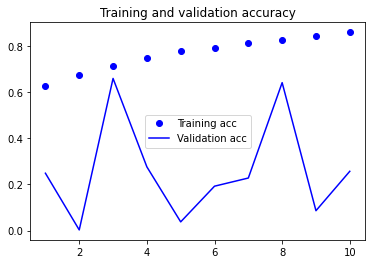

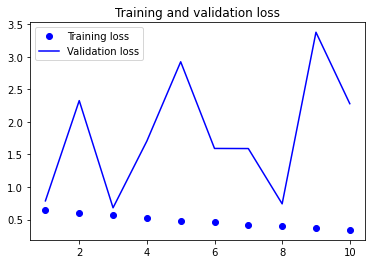

151/151 [==============================] - 9s 57ms/step - loss: 1.2274 - acc: 0.5236: 1s -


[1.2274222373962402, 0.5236409306526184]

In [6]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)